#Trabalho 02: Aprendizado não supervisionado

####Bruna Matias de Lima RA:820582

####Larissa Dias da Silva RA: 800204


*Departamento de Computação, Universidade Federal de São Carlos.*

Profº Alan Demétrius Baria Valejo

*Aprendizado de Máquina I*

Neste trabalho, utilizamos o conjunto de dados "Estimativas de Chegadas de Turistas Internacionais ao Brasil de 2024", disponível em: https://dados.gov.br/dados/conjuntos-dados/estimativas-de-chegadas-de-turistas-internacionais-ao-brasil

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# 01. Pré-processamento

Conhecendo os dados

In [ ]:
data = pd.read_csv('/content/chegadas_2024.csv', sep=';', encoding='latin1')

In [ ]:
data.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,10
1,América do Sul,4,Argentina,26,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1197
2,Europa,6,Bélgica,59,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,3
3,América do Norte,3,Canadá,23,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,2
4,América do Sul,4,Chile,28,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1


In [ ]:
data.dtypes

,0
Continente,object
cod continente,int64
País,object
cod pais,int64
UF,object
cod uf,int64
Via,object
cod via,int64
ano,int64
Mês,object


# 02. Limpeza

In [ ]:
# Verificando a presença de valores nulos
data.isnull().sum()

,0
Continente,0
cod continente,0
País,0
cod pais,0
UF,0
cod uf,0
Via,0
cod via,0
ano,0
Mês,0


In [ ]:
# Verificar número de linhas duplicadas completamente
data.duplicated().sum()

np.int64(1640)

In [ ]:
# Agrupando instâncias com dados iguais e somando o atributo Chegadas
group_cols = [col for col in data.columns if col != 'Chegadas']
data= data.groupby(group_cols, as_index=False)['Chegadas'].sum()

data.duplicated().sum()

np.int64(0)

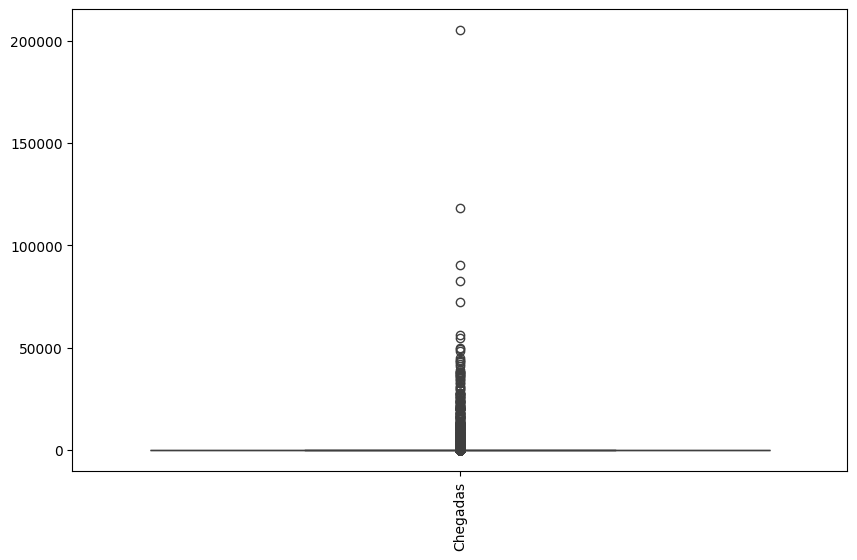

In [ ]:
# Buscando ruídos
colunas_desejadas = ['Chegadas']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[colunas_desejadas])
plt.xticks(rotation=90)
plt.show()

No cenário de turismo, outliers já são esperados por conta da alta sazonalidade em determinadas épocas do ano, esses acontecimentos representam muitas oportunidade de lucro para esse setor. Por conta disso, optamos por permanecer com esses dados.

# 03. Análise exploratória

Criando novas variáveis para explorar a sazonalidade

In [ ]:
data['ano'] = data['ano'].astype(str)
data['cod mes'] = data['cod mes'].astype(str).str.zfill(2)

data['Data'] = pd.to_datetime(data['ano'] + '-' + data['cod mes'] + '-01', format='%Y-%m-%d')

# Criar variáveis sazonais
data['mes'] = data['Data'].dt.month
data['trimestre'] = data['Data'].dt.quarter
data['semestre'] = data['mes'].apply(lambda x: 1 if x <= 6 else 2)
data['ano_mes'] = data['Data'].dt.to_period('M').astype(str)

# Variável de estação do ano
def estacao(m):
    if m in [12, 1, 2]:
        return 'verão'
    elif m in [3, 4, 5]:
        return 'outono'
    elif m in [6, 7, 8]:
        return 'inverno'
    else:
        return 'primavera'

data['estacao'] = data['mes'].apply(estacao)

In [ ]:
data.describe()

,cod continente,cod pais,cod uf,cod via,Chegadas,Data,mes,trimestre,semestre
count,15739.000000,15739.000000,15739.000000,15739.000000,15739.000000,15739,15739.000000,15739.000000,15739.000000
mean,4.680793,50.271491,18.049368,1.577991,430.371625,2024-06-14 07:09:00.491772160,6.432683,2.475062,1.488468
min,1.000000,1.000000,1.000000,1.000000,0.000000,2024-01-01 00:00:00,1.000000,1.000000,1.000000
25%,4.000000,27.000000,7.000000,1.000000,2.000000,2024-03-01 00:00:00,3.000000,1.000000,1.000000
50%,5.000000,52.000000,16.000000,1.000000,6.000000,2024-06-01 00:00:00,6.000000,2.000000,1.000000
75%,6.000000,73.000000,21.000000,2.000000,53.000000,2024-10-01 00:00:00,10.000000,4.000000,2.000000
max,8.000000,93.000000,99.000000,4.000000,205108.000000,2024-12-01 00:00:00,12.000000,4.000000,2.000000
std,1.654645,25.700993,17.789150,0.827896,3244.102887,NaN,3.605035,1.161585,0.499883


## Gráficos

### Chegadas por localidades

In [ ]:
data_agg = data.groupby('Continente', as_index=False)['Chegadas'].sum()

# Gerar o gráfico com os dados agregados
fig = px.bar(data_agg, x='Continente', y='Chegadas',
             title='Total de Chegadas por Continente',
             labels={'Chegadas': 'Total de Chegadas'},
             color='Continente')

fig.show()

In [ ]:
data_agg_pais = data.groupby('País', as_index=False)['Chegadas'].sum()
top_paises = data_agg_pais.sort_values(by='Chegadas', ascending=False).head(15)

fig = px.bar(top_paises, x='País', y='Chegadas',
             title='Top 15 Países em Chegadas',
             labels={'Chegadas': 'Total de Chegadas'},
             color='País')
fig.show()

In [ ]:
data_agg_uf = data.groupby('UF', as_index=False)['Chegadas'].sum()

fig = px.bar(data_agg_uf, x='UF', y='Chegadas',
             title='Total de Chegadas por Estado (UF)',
             labels={'Chegadas': 'Total de Chegadas'},
             color='UF')
fig.show()

### Formas de chegadas

In [ ]:
data_agg_via = data.groupby('Via', as_index=False)['Chegadas'].sum()

fig = px.bar(data_agg_via, x='Via', y='Chegadas',
             title='Total de Chegadas por Via de Entrada',
             labels={'Chegadas': 'Total de Chegadas', 'Via': 'Via de Entrada'},
             color='Via',
             text='Chegadas')
fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
data_via_tempo = data.groupby(['ano_mes', 'Via'], as_index=False)['Chegadas'].sum()

fig = px.line(data_via_tempo, x='ano_mes', y='Chegadas', color='Via',
              title='Evolução das Chegadas por Via de Entrada ao Longo do Tempo',
              labels={'ano_mes': 'Ano-Mês', 'Chegadas': 'Total de Chegadas'})
fig.update_xaxes(type='category')
fig.show()


In [ ]:
data_uf_via = data.groupby(['UF', 'Via'], as_index=False)['Chegadas'].sum()
top_ufs = data.groupby('UF')['Chegadas'].sum().nlargest(10).index
data_uf_via_top = data_uf_via[data_uf_via['UF'].isin(top_ufs)]

fig = px.bar(data_uf_via_top, x='UF', y='Chegadas', color='Via',
             title='Top 10 Estados com Mais Chegadas por Via de Entrada',
             barmode='group',
             labels={'UF': 'Estado (UF)', 'Chegadas': 'Total de Chegadas'})
fig.show()

### Sazonalidade das chegadas

In [ ]:
data_agg_mes = data.groupby('ano_mes', as_index=False)['Chegadas'].sum()

fig = px.line(data_agg_mes, x='ano_mes', y='Chegadas',
              title='Evolução Mensal das Chegadas',
              labels={'ano_mes': 'Ano-Mês', 'Chegadas': 'Total de Chegadas'})
fig.update_xaxes(type='category')
fig.show()

In [ ]:
data_agg_tri = data.groupby('trimestre', as_index=False)['Chegadas'].sum()

fig = px.bar(data_agg_tri, x='trimestre', y='Chegadas',
             title='Total de Chegadas por Trimestre',
             labels={'trimestre': 'Trimestre', 'Chegadas': 'Total de Chegadas'},
             color='trimestre')
fig.show()

In [ ]:
data_agg_estacao = data.groupby('estacao', as_index=False)['Chegadas'].sum()

fig = px.bar(data_agg_estacao, x='estacao', y='Chegadas',
             title='Total de Chegadas por Estação do Ano',
             labels={'estacao': 'Estação', 'Chegadas': 'Total de Chegadas'},
             color='estacao')
fig.show()

# 04. Seleção de variáveis

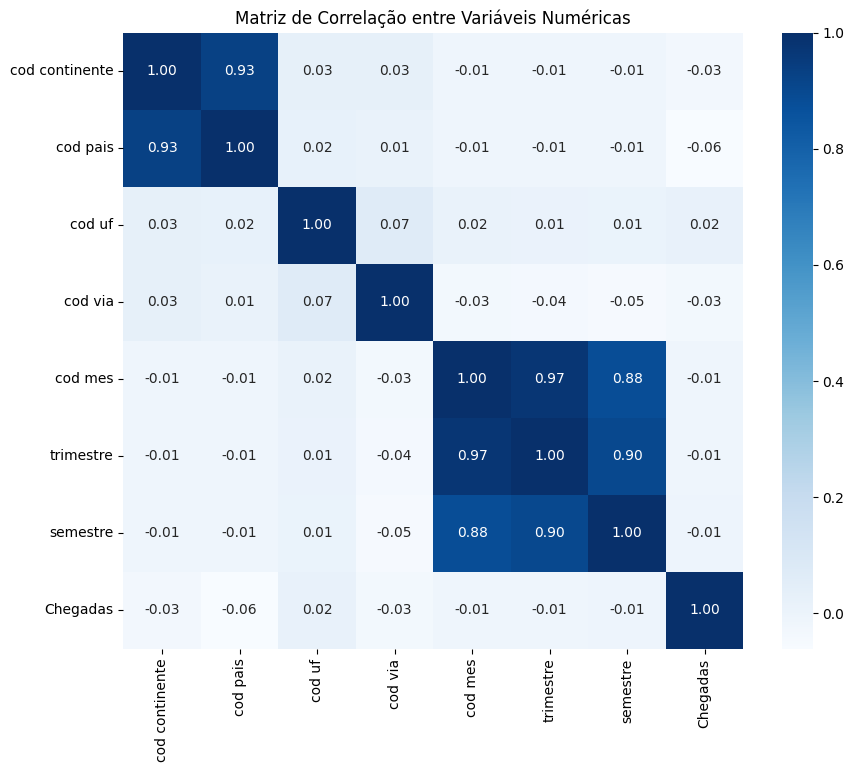

In [ ]:
num_cols = ['cod continente', 'cod pais', 'cod uf', 'cod via', 'cod mes', 'trimestre', 'semestre', 'Chegadas']

corr_matrix = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
df_agg = data.groupby('UF').agg({
    'Chegadas': 'sum',                         # Total de turistas
    'Via': lambda x: x.value_counts().idxmax(), # Via mais comum
    'estacao': lambda x: x.value_counts().idxmax(), # Estação mais comum
    'Continente': lambda x: x.value_counts().idxmax() # Continente mais comum
}).reset_index()

In [ ]:
# Codificando variáveis categóricas
df_encoded = pd.get_dummies(df_agg, columns=['Via', 'estacao', 'Continente'], drop_first=True)

In [ ]:
# Removendo variável redundante
data = data.drop(columns=['semestre'])

Normalização

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('UF', axis=1))

# 5. Aplicação do K-means

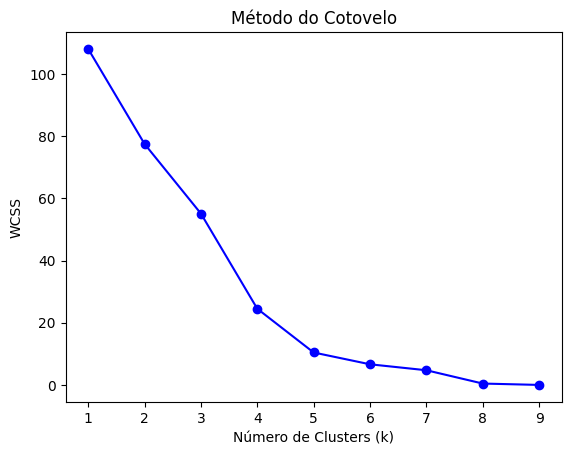

In [ ]:
from sklearn.cluster import KMeans

wcss = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
# Definimos k= 4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
result = df_encoded[['UF', 'cluster']]
print(result.sort_values(by='cluster'))

                              UF  cluster
0                           Acre        0
2                       Amazonas        0
6             Mato Grosso do Sul        0
14                Rio de Janeiro        0
12           Rio Grande do Norte        0
11                    Pernambuco        0
9                         Paraná        0
8   Outras Unidades da Federação        0
15                       Roraima        0
13             Rio Grande do Sul        0
16                Santa Catarina        0
3                          Bahia        1
4                          Ceará        1
7                   Minas Gerais        1
10                          Pará        1
5               Distrito Federal        1
1                          Amapá        2
17                     São Paulo        3


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    'UF': df_encoded['UF'],
    'Cluster': df_encoded['cluster'],
    'Chegadas': df_encoded['Chegadas'],
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1]
})

top_ufs = df_encoded.nlargest(5, 'Chegadas')['UF'].values
df_plot['show_text'] = df_plot['UF'].apply(lambda x: x if x in top_ufs else '')

fig = px.scatter(
    df_plot,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    text='show_text',
    hover_name='UF',
    title='Clusters de UFs com top 5 maiores chegadas',
    color_continuous_scale='Viridis'
)

fig.update_traces(textposition='top center')
fig.update_layout(legend_title='Cluster', hovermode='closest')
fig.show()

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df_pca_3d = pd.DataFrame({
    'UF': df_encoded['UF'],
    'Cluster': df_encoded['cluster'],
    'PCA1': X_pca_3d[:, 0],
    'PCA2': X_pca_3d[:, 1],
    'PCA3': X_pca_3d[:, 2]
})

fig = px.scatter_3d(
    df_pca_3d,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    hover_name='UF',
    title='Clusterização das UFs em 3D (K-Means + PCA)',
    color_continuous_scale='Viridis'
)

fig.update_layout(scene=dict(
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    zaxis_title='PCA 3'
))
fig.show()

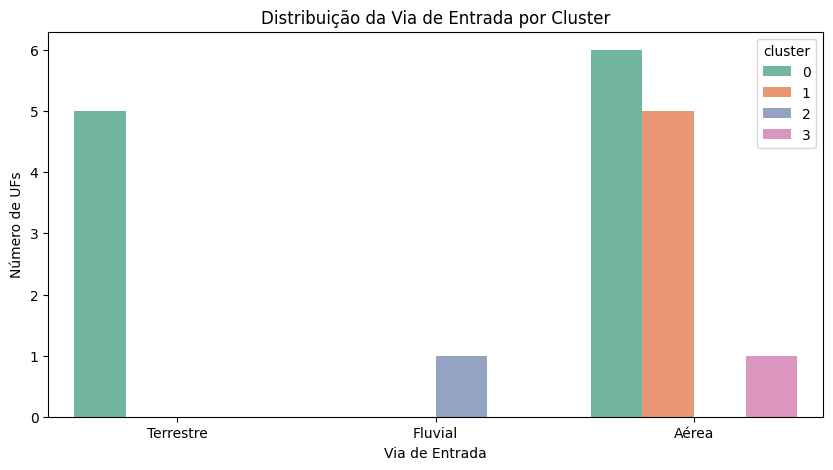

In [ ]:
df_clusters = df_encoded.join(df_agg[['Via', 'estacao', 'Continente']])

plt.figure(figsize=(10, 5))
sns.countplot(data=df_clusters, x='Via', hue='cluster', palette='Set2')
plt.title('Distribuição da Via de Entrada por Cluster')
plt.xlabel('Via de Entrada')
plt.ylabel('Número de UFs')
plt.show()

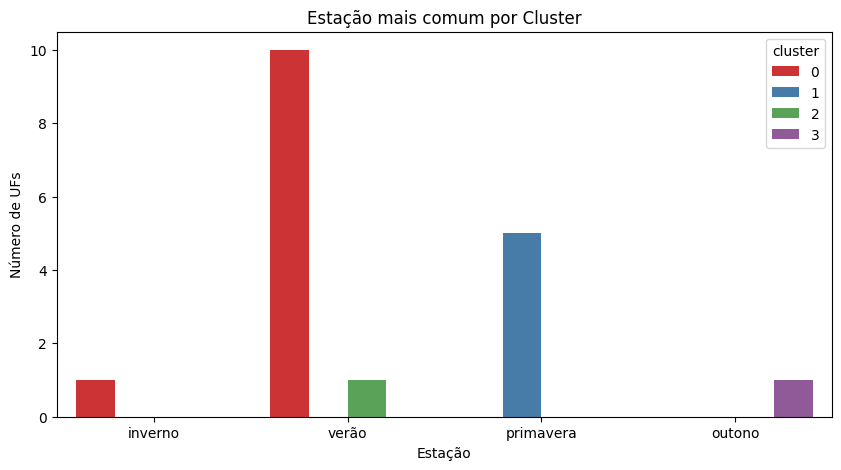

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clusters, x='estacao', hue='cluster', palette='Set1')
plt.title('Estação mais comum por Cluster')
plt.xlabel('Estação')
plt.ylabel('Número de UFs')
plt.show()

Cluster 0 de diferencia do 3 pelo volume de chegadas, pela forma como os turista chegam e pricipalmente porque possuem alta sazonalidade no verão por ser o cluster com mais estados litorâneos (6 de 11).

Cluster 1 não tem fronteira terrestre, exeto o Pará (mas não temso muitos turistas vindos dessa fronteira), chegada exclusivamente aérea

Cluster 3: São Paulo, recebe maior quantidade de turistas, exclusivamente aéreo

A divisão pode refletir fatores geográficos, logísticos e econômicos, sugerindo uso estratégico para planejamento turístico regional.

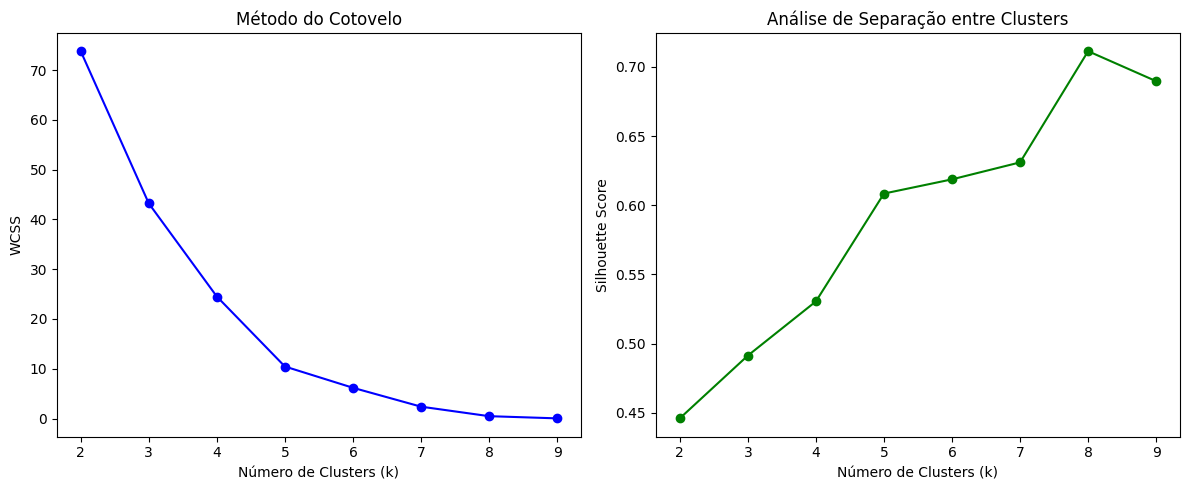

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Gráfico WCSS (Método do Cotovelo)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')

# Gráfico Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Análise de Separação entre Clusters')

plt.tight_layout()
plt.show()

## 6.Continuação do Pré-Processsamento:Codificação de variáveis categóricas




In [ ]:
# Verificando colunas categóricas
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Continente', 'País', 'UF', 'Via', 'ano', 'Mês', 'cod mes', 'ano_mes',
       'estacao'],
      dtype='object')

In [ ]:
# Aplicando codificação com pd.get_dummies
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_encoded.head()


,cod continente,cod pais,cod uf,cod via,Chegadas,Data,mes,trimestre,Continente_América do Norte,Continente_América do Sul,...,ano_mes_2024-06,ano_mes_2024-07,ano_mes_2024-08,ano_mes_2024-09,ano_mes_2024-10,ano_mes_2024-11,ano_mes_2024-12,estacao_outono,estacao_primavera,estacao_verão
0,2,12,1,2,2,2024-06-01,6,2,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2,12,1,2,1,2024-10-01,10,4,False,False,...,False,False,False,False,True,False,False,False,True,False
2,2,12,3,4,1,2024-07-01,7,3,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2,12,3,4,1,2024-11-01,11,4,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2,12,4,1,9,2024-04-01,4,2,False,False,...,False,False,False,False,False,False,False,True,False,False


## 7.Normalização dos dados

A célula garante que a coluna 'Data' (que é do tipo datetime) seja removida antes da normalização, pois não é uma feature numérica adequada para o DBSCAN. Em seguida, normaliza os dados usando MinMaxScaler.

Esse código usa o MinMaxScaler para normalizar os dados numéricos e deixar todos os valores entre 0 e 1, o que:
*   Evita que atributos com valores grandes dominem a análise;
*   Prepara os dados para algoritmos como DBSCAN;
*   Transforma os dados e os coloca de volta num DataFrame para facilitar a visualização e o uso.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Remover a coluna 'Data' antes da normalização e PCA para DBSCAN
# Assumindo que 'data_encoded' já foi criado com one-hot encoding das colunas categóricas.
if 'Data' in data_encoded.columns:
    data_final_for_dbscan = data_encoded.drop(columns=['Data'])
else:
    data_final_for_dbscan = data_encoded.copy() # Se já removeu, apenas copie

# Normalização dos dados para DBSCAN
scaler_dbscan = MinMaxScaler()
data_normalized_dbscan = scaler_dbscan.fit_transform(data_final_for_dbscan)
data_normalized_dbscan = pd.DataFrame(data_normalized_dbscan, columns=data_final_for_dbscan.columns)

print("Cabeçalho dos dados normalizados para DBSCAN:")
print(data_normalized_dbscan.head())
print(f"\nDimensões dos dados normalizados para DBSCAN: {data_normalized_dbscan.shape}")

# --- Redução de Dimensionalidade (PCA) para DBSCAN ---
# Reduzir os dados para 2 dimensões para facilitar a visualização e o tuning do DBSCAN.
n_components_pca_dbscan = 2
pca_dbscan = PCA(n_components=n_components_pca_dbscan)
X_pca_dbscan = pca_dbscan.fit_transform(data_normalized_dbscan)

print(f"\nDados após PCA para DBSCAN (shape): {X_pca_dbscan.shape}")

Cabeçalho dos dados normalizados para DBSCAN:
   cod continente  cod pais    cod uf   cod via  Chegadas       mes  \
0        0.142857  0.119565  0.000000  0.333333  0.000010  0.454545   
1        0.142857  0.119565  0.000000  0.333333  0.000005  0.818182   
2        0.142857  0.119565  0.020408  1.000000  0.000005  0.545455   
3        0.142857  0.119565  0.020408  1.000000  0.000005  0.909091   
4        0.142857  0.119565  0.030612  0.000000  0.000044  0.272727   

   trimestre  Continente_América do Norte  Continente_América do Sul  \
0   0.333333                          0.0                        0.0   
1   1.000000                          0.0                        0.0   
2   0.666667                          0.0                        0.0   
3   1.000000                          0.0                        0.0   
4   0.333333                          0.0                        0.0   

   Continente_Continente não especificado  ...  ano_mes_2024-06  \
0                          

## 8.Análise com **DBSCan**

DBSCAN é um algoritmo de agrupamento (clustering) que encontra grupos com base em densidade.

Parâmetros:

**eps**: a distância máxima entre dois pontos pra que sejam considerados vizinhos;

**min_samples**: o mínimo de pontos vizinhos pra formar um cluster.

Esta célula abaixo gera o gráfico de k-distância, essencial para visualizar e escolher um valor adequado para o parâmetro eps.


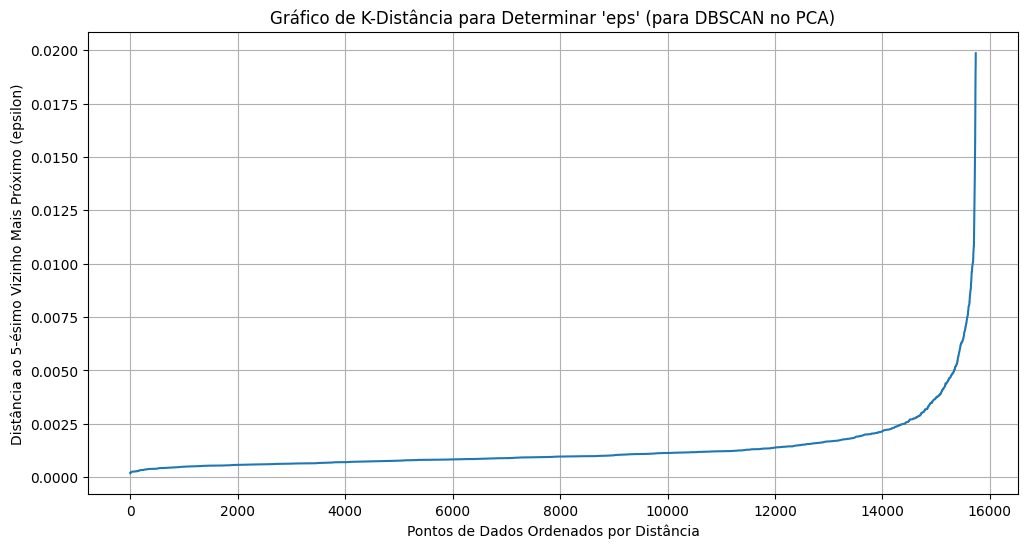


--- GRÁFICO DE K-DISTÂNCIA PARA DBSCAN ---
Observe o 'cotovelo' (o ponto onde a curva muda abruptamente de inclinação) no gráfico acima.
Este ponto sugere um bom valor para o parâmetro 'eps'.
Anote o valor 'epsilon' correspondente no eixo Y onde você vê o 'cotovelo'.
Você precisará usar este valor para 'eps_val_tuned' na próxima célula.
Por exemplo, um valor pode ser 0.05 (ajuste com base na sua observação).


In [ ]:
# --- Determinar Optimal 'eps' usando K-distance Graph ---
# min_samples_val: O mínimo de pontos que um cluster deve ter.
# Um bom ponto de partida é 5, como estava no seu notebook, ou 2 * n_dimensões (do PCA).
min_samples_val_dbscan = 5 # Você pode ajustar este valor se necessário

neighbors_dbscan = NearestNeighbors(n_neighbors=min_samples_val_dbscan)
neighbors_fit_dbscan = neighbors_dbscan.fit(X_pca_dbscan)
distances_dbscan, indices_dbscan = neighbors_fit_dbscan.kneighbors(X_pca_dbscan)

# Ordenar as distâncias ao k-ésimo vizinho e plotar
distances_dbscan = np.sort(distances_dbscan[:, min_samples_val_dbscan-1], axis=0)
plt.figure(figsize=(12, 6))
plt.plot(distances_dbscan)
plt.xlabel("Pontos de Dados Ordenados por Distância")
plt.ylabel(f"Distância ao {min_samples_val_dbscan}-ésimo Vizinho Mais Próximo (epsilon)")
plt.title("Gráfico de K-Distância para Determinar 'eps' (para DBSCAN no PCA)")
plt.grid(True)
plt.show()

print("\n--- GRÁFICO DE K-DISTÂNCIA PARA DBSCAN ---")
print("Observe o 'cotovelo' (o ponto onde a curva muda abruptamente de inclinação) no gráfico acima.")
print("Este ponto sugere um bom valor para o parâmetro 'eps'.")
print("Anote o valor 'epsilon' correspondente no eixo Y onde você vê o 'cotovelo'.")
print("Você precisará usar este valor para 'eps_val_tuned' na próxima célula.")
# Exemplo de valor de eps_val_placeholder (apenas um exemplo, ajuste com base no seu gráfico)
eps_val_placeholder_dbscan = 0.05
print(f"Por exemplo, um valor pode ser {eps_val_placeholder_dbscan} (ajuste com base na sua observação).")

Esta célula aplica o algoritmo DBSCAN com os parâmetros que ajustados com base no gráfico anterior.

In [ ]:
# Se obtiver -1 para todos os pontos, tente aumentar 'eps_val_tuned' gradualmente.
# Se obtiver muitos clusters pequenos, tente diminuir 'eps_val_tuned' ou aumentar 'min_samples_val_dbscan'.

# Usar o valor identificado no gráfico de k-distância.
eps_val_tuned = 0.03
min_samples_val_dbscan = 7 # Mantendo o valor definido na célula anterior

dbscan = DBSCAN(eps=eps_val_tuned, min_samples=min_samples_val_dbscan)
clusters_dbscan = dbscan.fit_predict(X_pca_dbscan)

# Adicionar os rótulos de cluster ao DataFrame PCA para visualização
df_pca_dbscan = pd.DataFrame(X_pca_dbscan, columns=['PCA1', 'PCA2'])
df_pca_dbscan['Cluster'] = clusters_dbscan

print("--- RESULTADOS DO DBSCAN ---")
print("Contagem de pontos por cluster (após PCA e ajuste de 'eps'):")
print(df_pca_dbscan['Cluster'].value_counts())

--- RESULTADOS DO DBSCAN ---
Contagem de pontos por cluster (após PCA e ajuste de 'eps'):
Cluster
4    2497
2    2320
5    1547
8    1501
6    1489
7    1443
3    1442
1    1233
9    1146
0    1121
Name: count, dtype: int64


Esta célula plota os resultados do DBSCAN, mostrando os diferentes clusters e os pontos de ruído:

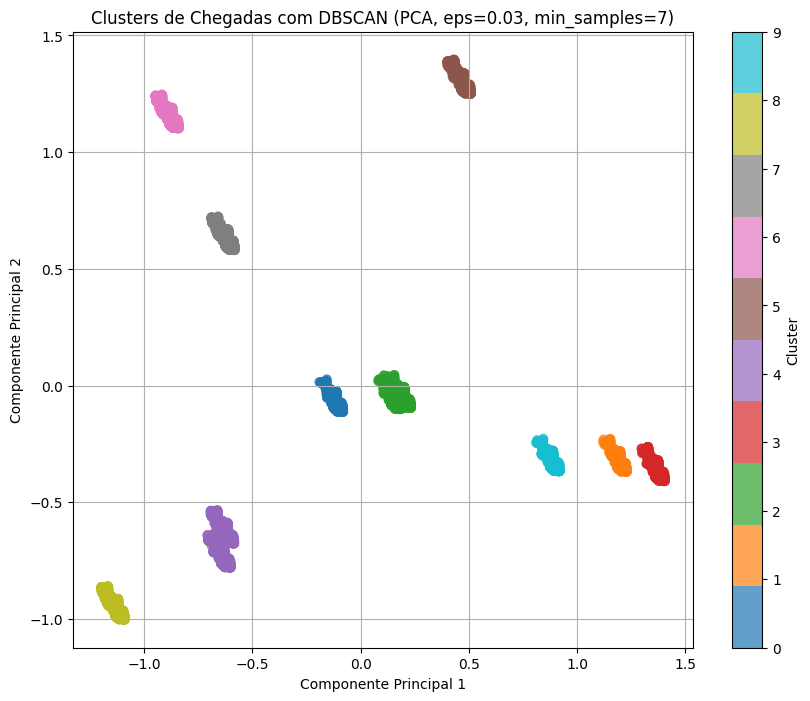


--- ANÁLISE DO GRÁFICO DBSCAN ---
O gráfico acima contém cores diferentes representando os clusters encontrados.
Pontos com a mesma cor pertencem ao mesmo cluster.
A cor correspondente ao cluster -1 (ruído) mostra os pontos que não puderam ser agrupados.
Se o gráfico ainda mostrar muitos pontos como ruído (apenas a cor -1 dominante) ou apenas um cluster muito grande,
isso significa que o 'eps_val_tuned' ainda precisa ser ajustado com base no gráfico de k-distância,
ou 'min_samples_val_dbscan' precisa ser reduzido, ou a estrutura de cluster não é densa para o DBSCAN.


In [ ]:
# --- Visualizar os Novos Clusters do DBSCAN ---
plt.figure(figsize=(10, 8))
# Pontos de ruído (-1) serão plotados em uma cor diferente (geralmente cinza ou preto)
plt.scatter(df_pca_dbscan['PCA1'], df_pca_dbscan['PCA2'], c=df_pca_dbscan['Cluster'], cmap='tab10', s=40, alpha=0.7)
plt.title(f'Clusters de Chegadas com DBSCAN (PCA, eps={eps_val_tuned}, min_samples={min_samples_val_dbscan})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

print("\n--- ANÁLISE DO GRÁFICO DBSCAN ---")
print("O gráfico acima contém cores diferentes representando os clusters encontrados.")
print("Pontos com a mesma cor pertencem ao mesmo cluster.")
print("A cor correspondente ao cluster -1 (ruído) mostra os pontos que não puderam ser agrupados.")
print("Se o gráfico ainda mostrar muitos pontos como ruído (apenas a cor -1 dominante) ou apenas um cluster muito grande,")
print("isso significa que o 'eps_val_tuned' ainda precisa ser ajustado com base no gráfico de k-distância,")
print("ou 'min_samples_val_dbscan' precisa ser reduzido, ou a estrutura de cluster não é densa para o DBSCAN.")

Esta célula mostra um resumo da distribuição dos pontos entre os clusters:

In [ ]:
# Contagem final de pontos por cluster do DBSCAN
df_pca_dbscan['Cluster'].value_counts()

,count
Cluster,
4,2497
2,2320
5,1547
8,1501
6,1489
7,1443
3,1442
1,1233
9,1146


--- Iniciando Análise Paramétrica e de Silhueta para DBSCAN (Foco na Velocidade) ---
Total de combinações a testar: 65
Progresso: 10/65 (eps=0.03, min_samples=11)
Progresso: 20/65 (eps=0.05, min_samples=11)
Progresso: 30/65 (eps=0.07, min_samples=11)
Progresso: 40/65 (eps=0.09, min_samples=11)
Progresso: 50/65 (eps=0.11, min_samples=11)
Progresso: 60/65 (eps=0.13, min_samples=11)
Progresso: 65/65 (eps=0.14, min_samples=11)

Melhor Silhouette Score para DBSCAN encontrado: 0.8594
Melhores Parâmetros (eps, min_samples) correspondentes: (np.float64(0.03), 7)


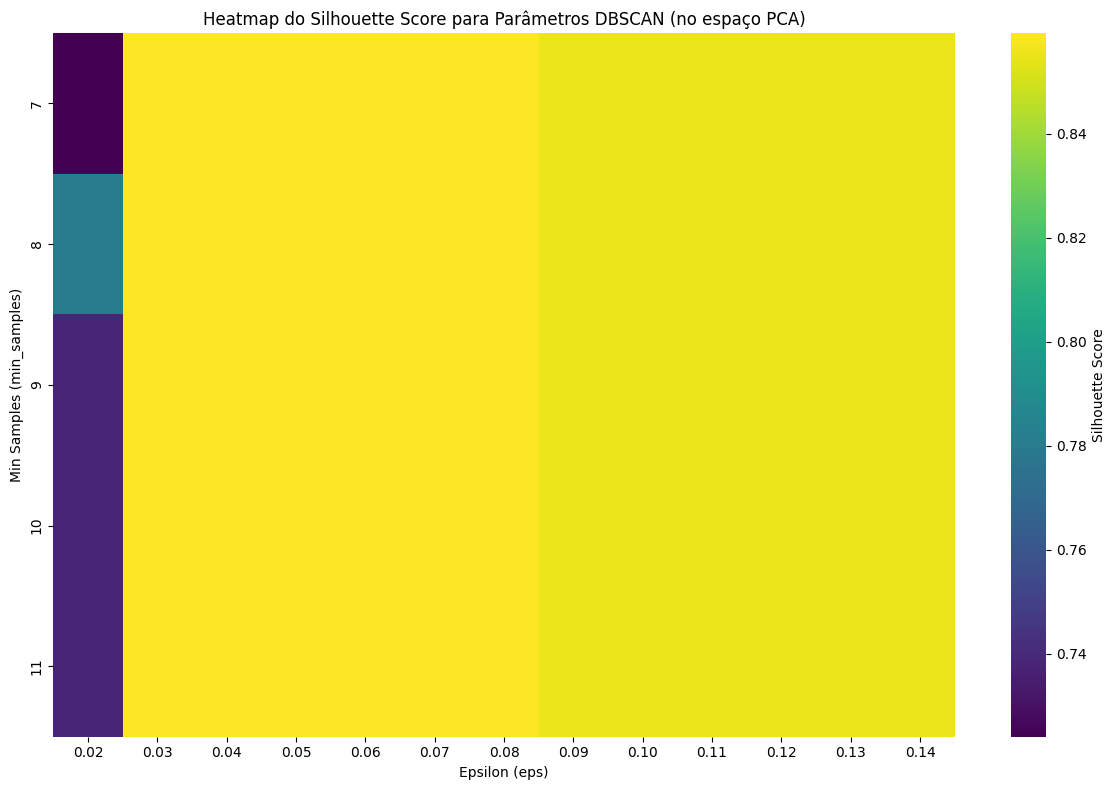


--- Iniciando Análise Subjetiva dos Grupos DBSCAN ---

Executando DBSCAN final com eps=0.03 e min_samples=7

Resumo Detalhado dos Clusters DBSCAN (excluindo pontos de ruído):
   DBSCAN_Cluster  Total_Chegadas  Media_Chegadas Via_Mais_Comum  \
0               0          332474      296.586976          Aérea   
1               1          508738      412.601784          Aérea   
2               2          855043      368.553017          Aérea   
3               3          560732      388.857143          Aérea   
4               4          734239      294.048458          Aérea   
5               5          806478      521.317388          Aérea   
6               6          833306      559.641370          Aérea   
7               7          956737      663.019404          Aérea   
8               8          740483      493.326449          Aérea   
9               9          445389      388.646597          Aérea   

  Estacao_Mais_Comum Continente_Mais_Comum  Numero_Paises  \
0            i

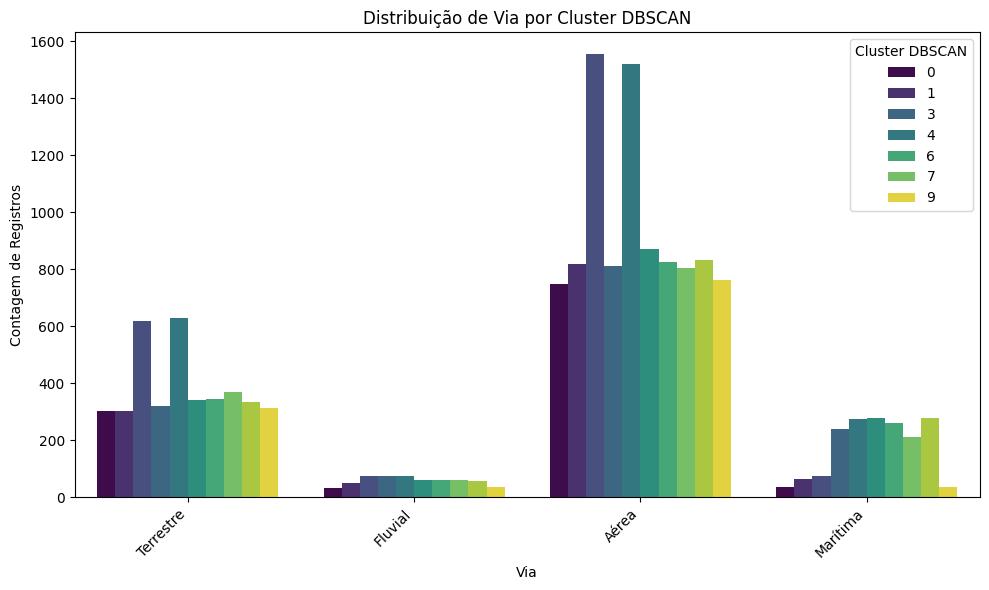

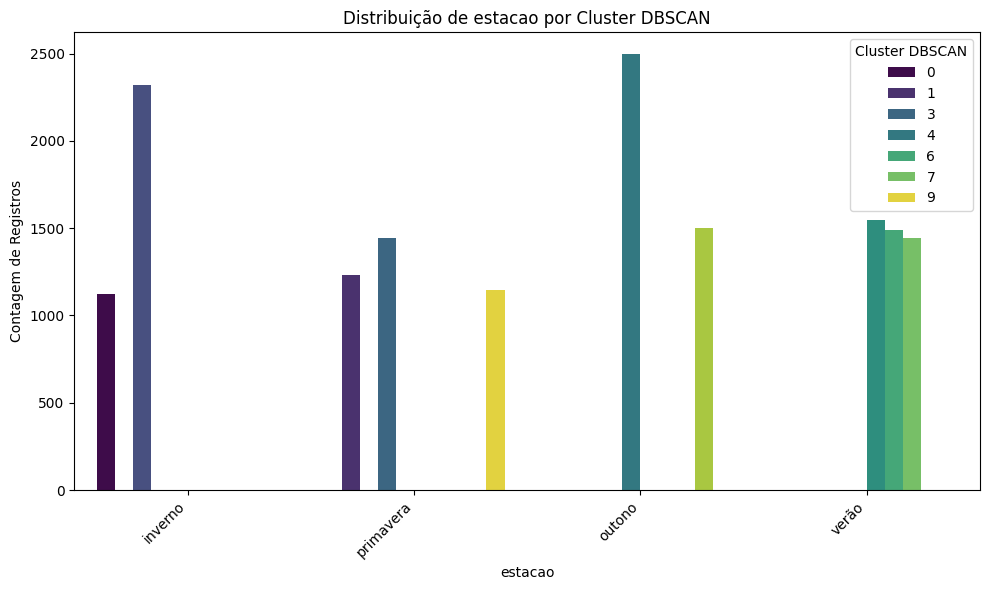

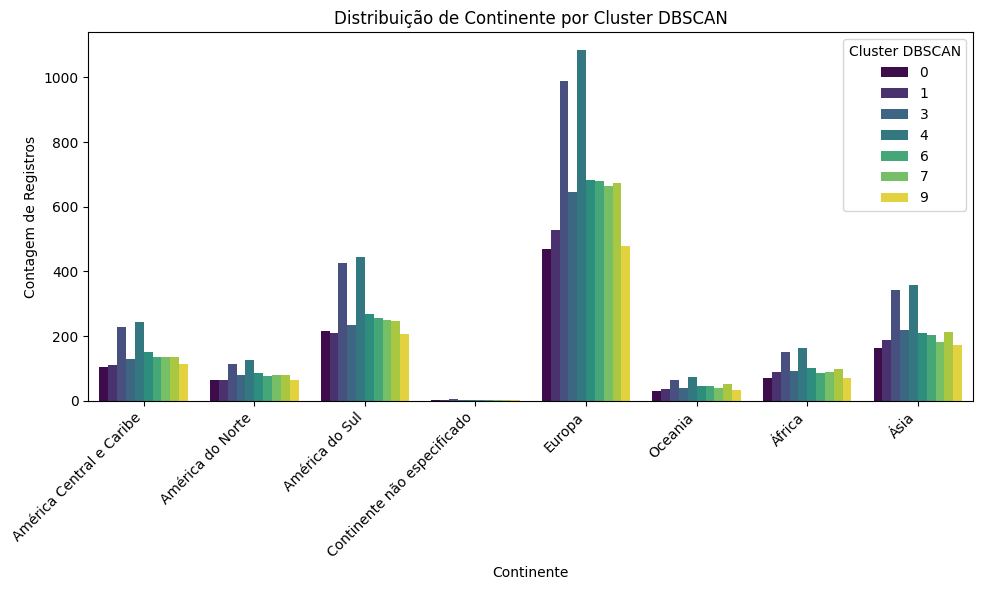


--- Interpretação Subjetiva dos Clusters DBSCAN ---

Análise do Cluster 0:
  - Este cluster possui um Total de Chegadas de: 332,474 (Média por registro: 296.59).
  - A Via de Entrada mais comum é: Aérea.
  - A Estação do Ano mais frequente para chegadas é: inverno.
  - O Continente de origem mais comum é: Europa.
  - Inclui chegadas de 92 países distintos, com os principais sendo: Argentina, Estados Unidos, França.
  - Este cluster contém 1121 registros.

Análise do Cluster 1:
  - Este cluster possui um Total de Chegadas de: 508,738 (Média por registro: 412.60).
  - A Via de Entrada mais comum é: Aérea.
  - A Estação do Ano mais frequente para chegadas é: primavera.
  - O Continente de origem mais comum é: Europa.
  - Inclui chegadas de 92 países distintos, com os principais sendo: Alemanha, França, Argentina.
  - Este cluster contém 1233 registros.

Análise do Cluster 2:
  - Este cluster possui um Total de Chegadas de: 855,043 (Média por registro: 368.55).
  - A Via de Entrada mais c

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score



# --- PASSO 3: Análise Paramétrica e de Silhueta para DBSCAN (Versão Simplificada e Rápida) ---
print("--- Iniciando Análise Paramétrica e de Silhueta para DBSCAN (Foco na Velocidade) ---")

# ATENÇÃO: Estes ranges são menores para acelerar a execução.
# Eles podem não explorar todo o espaço de parâmetros ótimos.
# Ajustar conforme necessidade e a análise do gráfico de k-distância.
eps_values = np.arange(0.02, 0.15, 0.01) # Range mais estreito, e passo maior para menos iterações
min_samples_values = range(7, 12)       # Range mais estreito

silhouette_scores_dbscan = {}
total_iterations = len(eps_values) * len(min_samples_values)
current_iteration = 0

print(f"Total de combinações a testar: {total_iterations}")

for eps in eps_values:
    for min_samples in min_samples_values:
        current_iteration += 1
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_pca_dbscan)

        n_clusters = len(np.unique(clusters))
        # Calcula o silhouette score apenas se houver clusters válidos (mais de 1 cluster real).
        if n_clusters > 1 and not (n_clusters == 2 and -1 in np.unique(clusters)):
            if -1 in np.unique(clusters):
                valid_indices = clusters != -1
                if len(np.unique(clusters[valid_indices])) > 1:
                    score = silhouette_score(X_pca_dbscan[valid_indices], clusters[valid_indices])
                    silhouette_scores_dbscan[(eps, min_samples)] = score
            else:
                score = silhouette_score(X_pca_dbscan, clusters)
                silhouette_scores_dbscan[(eps, min_samples)] = score

        # Opcional: print de progresso a cada 10 iterações ou no final
        if current_iteration % 10 == 0 or current_iteration == total_iterations:
           print(f"Progresso: {current_iteration}/{total_iterations} (eps={eps:.2f}, min_samples={min_samples})")

# Encontra a melhor combinação de parâmetros
best_score_dbscan = -1
best_params_dbscan = (0, 0)
for (eps, min_samples), score in silhouette_scores_dbscan.items():
    if score > best_score_dbscan:
        best_score_dbscan = score
        best_params_dbscan = (eps, min_samples)

print(f"\nMelhor Silhouette Score para DBSCAN encontrado: {best_score_dbscan:.4f}")
print(f"Melhores Parâmetros (eps, min_samples) correspondentes: {best_params_dbscan}")

# Plotando o Heatmap do Silhouette Score (mantido para visualização)
if silhouette_scores_dbscan:
    eps_grid_dbscan = sorted(list(set([k[0] for k in silhouette_scores_dbscan.keys()])))
    min_samples_grid_dbscan = sorted(list(set([k[1] for k in silhouette_scores_dbscan.keys()])))

    heatmap_data_dbscan = np.full((len(min_samples_grid_dbscan), len(eps_grid_dbscan)), np.nan)
    for i, min_s in enumerate(min_samples_grid_dbscan):
        for j, ep in enumerate(eps_grid_dbscan):
            if (ep, min_s) in silhouette_scores_dbscan:
                heatmap_data_dbscan[i, j] = silhouette_scores_dbscan[(ep, min_s)]

    plt.figure(figsize=(12, 8)) # Tamanho um pouco menor para rapidez na visualização
    sns.heatmap(heatmap_data_dbscan, cmap='viridis', annot=False, fmt=".2f",
                xticklabels=[f'{e:.2f}' for e in eps_grid_dbscan],
                yticklabels=[str(m) for m in min_samples_grid_dbscan],
                cbar_kws={'label': 'Silhouette Score'})
    plt.xlabel('Epsilon (eps)')
    plt.ylabel('Min Samples (min_samples)')
    plt.title('Heatmap do Silhouette Score para Parâmetros DBSCAN (no espaço PCA)')
    plt.tight_layout()
    plt.show()
else:
    print("\nNão foi possível gerar o heatmap do Silhouette Score. Isso pode ocorrer se nenhuma combinação de parâmetros resultou em clusters válidos (todos os pontos são ruído ou apenas um cluster). Tente ajustar os ranges de 'eps_values' e 'min_samples_values'.")


# --- PASSO 4: Análise Subjetiva dos Grupos DBSCAN ---
print("\n--- Iniciando Análise Subjetiva dos Grupos DBSCAN ---")

# Aplica o DBSCAN com os melhores parâmetros encontrados na etapa anterior.
# Se o 'best_score_dbscan' for muito baixo ou negativo, '0.1' e '10' serão usados como fallback.
chosen_eps = best_params_dbscan[0] if best_score_dbscan > 0 else 0.1
chosen_min_samples = best_params_dbscan[1] if best_score_dbscan > 0 else 10

print(f"\nExecutando DBSCAN final com eps={chosen_eps:.2f} e min_samples={chosen_min_samples}")
dbscan_final = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
clusters_final_dbscan = dbscan_final.fit_predict(X_pca_dbscan)

# Adiciona os rótulos de cluster ao DataFrame 'data' original para interpretação.
# 'data' deve ser o seu DataFrame original, com as colunas legíveis antes da codificação e normalização.
data_original_with_dbscan_clusters = globals().get('data', None)
if data_original_with_dbscan_clusters is None:
    print("\nERRO: O DataFrame 'data' (original e pré-processado) não está disponível no ambiente. Certifique-se de que as etapas de carregamento e pré-processamento de dados foram executadas com sucesso antes desta célula.")
else:
    data_original_with_dbscan_clusters = data.copy()
    data_original_with_dbscan_clusters['DBSCAN_Cluster'] = clusters_final_dbscan

    # Filtra os pontos de ruído (-1) para focar a análise nos clusters formados.
    data_clustered_for_analysis = data_original_with_dbscan_clusters[data_original_with_dbscan_clusters['DBSCAN_Cluster'] != -1]

    if not data_clustered_for_analysis.empty:
        # Agrupa por cluster e obtém estatísticas descritivas para cada grupo.
        cluster_summary_dbscan = data_clustered_for_analysis.groupby('DBSCAN_Cluster').agg(
            Total_Chegadas=('Chegadas', 'sum'),
            Media_Chegadas=('Chegadas', 'mean'),
            Via_Mais_Comum=('Via', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
            Estacao_Mais_Comum=('estacao', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
            Continente_Mais_Comum=('Continente', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
            Numero_Paises=('País', 'nunique'),
            Paises_Principais=('País', lambda x: x.value_counts().nlargest(3).index.tolist())
        ).reset_index()

        print("\nResumo Detalhado dos Clusters DBSCAN (excluindo pontos de ruído):")
        print(cluster_summary_dbscan)

        # Visualiza a distribuição de features categóricas nos clusters.
        categorical_features_for_subjective_analysis = ['Via', 'estacao', 'Continente']
        for feature in categorical_features_for_subjective_analysis:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=data_clustered_for_analysis, x=feature, hue='DBSCAN_Cluster', palette='viridis')
            plt.title(f'Distribuição de {feature} por Cluster DBSCAN')
            plt.xlabel(feature)
            plt.ylabel('Contagem de Registros')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Cluster DBSCAN')
            plt.tight_layout()
            plt.show()

        # Interpretação Subjetiva dos Clusters
        print("\n--- Interpretação Subjetiva dos Clusters DBSCAN ---")
        num_clusters_dbscan_found = len(cluster_summary_dbscan)
        if num_clusters_dbscan_found > 0:
            for index, row in cluster_summary_dbscan.iterrows():
                print(f"\nAnálise do Cluster {int(row['DBSCAN_Cluster'])}:")
                print(f"  - Este cluster possui um Total de Chegadas de: {row['Total_Chegadas']:,} (Média por registro: {row['Media_Chegadas']:.2f}).")
                print(f"  - A Via de Entrada mais comum é: {row['Via_Mais_Comum']}.")
                print(f"  - A Estação do Ano mais frequente para chegadas é: {row['Estacao_Mais_Comum']}.")
                print(f"  - O Continente de origem mais comum é: {row['Continente_Mais_Comum']}.")
                print(f"  - Inclui chegadas de {row['Numero_Paises']} países distintos, com os principais sendo: {', '.join(row['Paises_Principais'])}.")
                print(f"  - Este cluster contém {data_original_with_dbscan_clusters['DBSCAN_Cluster'].value_counts()[row['DBSCAN_Cluster']]} registros.")

            noise_points_count = (clusters_final_dbscan == -1).sum()
            print(f"\nNúmero de Pontos de Ruído (Cluster -1): {noise_points_count}")
            if noise_points_count > 0:
                print(f"Os {noise_points_count} pontos de ruído são registros que o DBSCAN não conseguiu agrupar em nenhum cluster devido à sua baixa densidade em relação aos parâmetros definidos. Eles podem ser considerados outliers ou dados que não se encaixam bem nos padrões de densidade existentes.")
        else:
            print("\nO DBSCAN não conseguiu formar nenhum cluster válido (todos os pontos foram classificados como ruído ou há menos de 2 clusters). Isso pode indicar que a estrutura de densidade dos seus dados não é adequada para o DBSCAN, ou que os parâmetros 'eps' e 'min_samples' precisam ser amplamente ajustados para encontrar grupos.")

    else:
        print("\nO DBSCAN não formou clusters válidos (todos os pontos foram classificados como ruído). Não é possível realizar uma análise subjetiva dos clusters. Tente ajustar os parâmetros 'eps' e 'min_samples' do DBSCAN para tentar encontrar agrupamentos mais densos.")